# Лабораторная работа № 1 (практическая часть)

In [1]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8'))
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    task3 = rs.randint(low=1, high=5)
    task4 = rs.randint(low=1, high=4)
    print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))

enter phystech e-mail
sadiev.aa@phystech.edu
Your tasks are 1.1, 2.4, 3.2, 4.3


In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd

In [3]:
from arch.bootstrap import IIDBootstrap

from statsmodels.stats.descriptivestats import sign_test

# Task 3

Выборка представляет собой статистику бросков для различных игроков NBA. Для каждого игрока известны:

1. количество успешных бросков в домашних играх (score_home)
2. количество бросков в домашних играх (atm_home)
3. количество успешных бросков в гостевых играх (score_away)
4. количество бросков в гостевых играх (atm_away)

Требуется определить, есть ли разница в успехе бросков у игроков в домашних и гостевых играх.

У какого процента игроков разница в успехе существенна?

In [4]:
data = pd.read_csv('nba.csv')
data.sample(5)

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
486,878,Jones,SAC,30,21,18,16,51,34
587,1058,McInnis,CHA,44,18,33,12,62,45
759,1385,Shumpert,NYK,51,58,37,50,109,87
121,228,Brooks,HOU,317,334,277,277,651,554
171,316,Cole,MIA,43,42,34,32,85,66


По таким данным, пока сложно что-то сразу сказать или применить критерий корректно. Поэтому вычислим вероятности успешного броска. И по ним можно воспользоваться знакывыми критериями или даже критерий стьюдента. Поскольку в первом случае мы хотим понять есть ли разница в успехе броска.

In [5]:
ratio = {'ratio_away': data['score_away'].values / data['atm_away'].values,
         'ratio_home': data['score_home'].values / data['atm_home'].values}
Data = pd.DataFrame(ratio)
X = Data.values

Критерий знаковых рангов Уилкоксона для связанных выборок

Двухвыборочный критерий знаков

Критерий хи-квадрат

In [18]:
print('Wilcoxon: p-value = {}'.format(round(st.wilcoxon(X.T[0],  X.T[1])[1], 3)))
print('Sign test: p-value = {}'.format(round(sign_test(X.T[0] - X.T[1], mu0 = 0)[1], 3)))
print('Chi square: p-value = {}'.format(round(st.chisquare(f_obs = X.T[0], f_exp= X.T[1])[1], 3)))

Wilcoxon: p-value = 0.091
Sign test: p-value = 0.159
Chi square: p-value = 1.0


 Статистические данные гипотизе не противоречат.

Критерий стьдента (предположим, что выборка подчинена нормальному закону)

In [10]:
st.shapiro(X.T[0]), st.shapiro(X.T[1])

((0.958825945854187, 1.4541871167582485e-15),
 (0.9490501284599304, 1.8678729193821203e-17))

То предположение грубая ошибка), поэтому не будем использовать критерий Стьюдента 

Доверительные интервалы 

In [11]:
R = X.T[0]- X.T[1]
S = X.T[0]> X.T[1]
D = np.append(R[R > 0.0017174] , R[ R < -0.00837534])

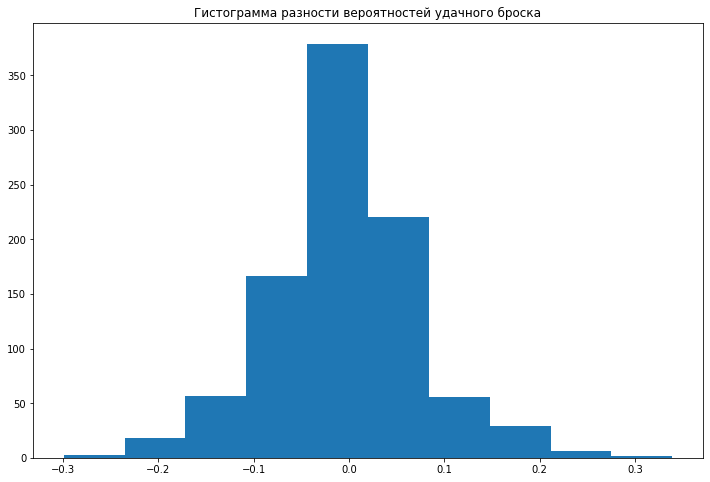

In [20]:
plt.figure(figsize = (12, 8))
plt.hist(R)
#plt.axvline(-0.00837534, color  = 'red')
#plt.axvline(0.0017174 , color  = 'red')
plt.title('Гистограмма разности вероятностей удачного броска')
plt.show()

Честно говоря, у меня нет идей, как нормально посчитать процент играков, для которых существенно, где они играют. Тогда посмотрим на гистограмму и поставим ограничение, что для играков, чья разности вероятностей успеха по модулю больше, чем $0.1$, локация игры существенна.

In [25]:
D = np.append(R[R > 0.1] , R[ R < -0.1])
print('процент игроков разница в успехе существенна = {}%'. format(round(len(D)/len(R)*100, 2)))

процент игроков разница в успехе существенна = 17.2%
